In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [234]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Plan
## Don't touch the testset!
1. Explore and transform the training dataset
2. Build a pipeline to automate transformation
3. Build and evaluate machine learning models
4. Tune the models

## Touch it!
5. Apply the full transformation pipeline to the test set
6. Run the model on the test set

# Quick Look

In [235]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [236]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
# A lot of values in Ticket and Cabin are unique. We might do feature engineering 
# for those two to extract any useful information or we drop it.
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We don't have to split the training dataset into test set and training set because the competition already provides a test set for us to evaluate the models.

In [238]:
print("Test Shape:", test_df.shape)
print("Train Shape:", train_df.shape)

Test Shape: (418, 11)
Train Shape: (891, 12)


# Let's visualize our data

In [239]:
# Copy the training set for easier manipulation
# Drop PassegnerId, Cabin, and Ticket
training = train_df.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1).copy()

<AxesSubplot:xlabel='Sex', ylabel='count'>

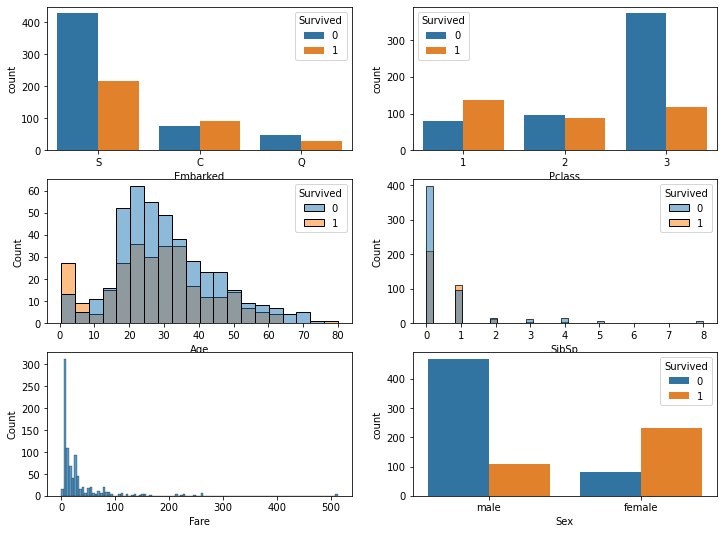

In [240]:
plt.figure(figsize=(12, 9))

plt.subplot(321)
sns.countplot(data=training, x='Embarked', hue='Survived')

plt.subplot(322)
sns.countplot(data=training, x='Pclass', hue='Survived')

plt.subplot(323)
sns.histplot(data=training, x='Age', hue='Survived')

plt.subplot(324)
sns.histplot(data=training, x='SibSp', hue='Survived')

plt.subplot(325)
sns.histplot(data=training, x='Fare')

plt.subplot(326)
sns.countplot(data=training, x='Sex', hue='Survived')


In [241]:
# Try feature engineering with Name
training['Title'] = training['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['Title'].value_counts()<10
training['Title'].value_counts()['Rev']
training['Title'] = training['Title'].apply(lambda x: 'Rare' if training['Title'].value_counts()[x] < 10 else x)
training['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [242]:
# Try feature engineering with FamilySize
training['FamilySize'] = training['SibSp'] + training['Parch'] + 1
training['IsAlone'] = 1
training.loc[training['FamilySize'] > 1, 'IsAlone'] = 0
training

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rare,1,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss,4,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr,1,1


<AxesSubplot:xlabel='IsAlone', ylabel='count'>

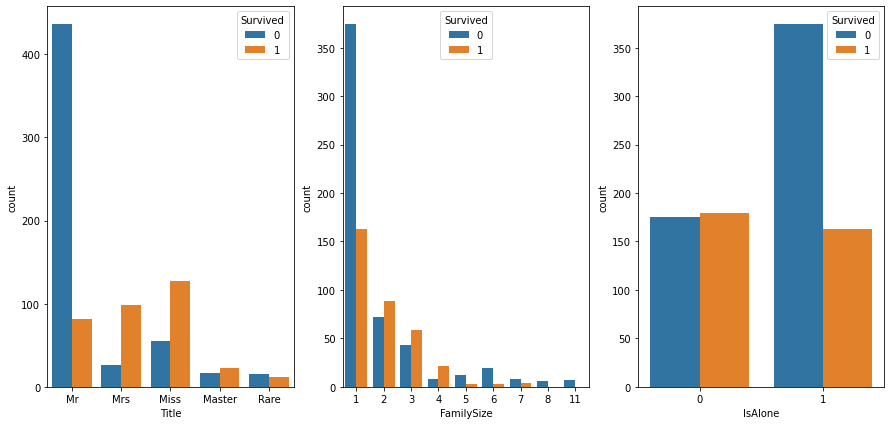

In [243]:
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.countplot(data=training, x='Title', hue='Survived')

plt.subplot(132)
sns.countplot(data=training, x='FamilySize', hue='Survived')

plt.subplot(133)
sns.countplot(data=training, x='IsAlone', hue='Survived')

In [244]:
# Convert Sex to dummy variable to make it easier to look for correlation
training['Sex'] = training['Sex'].apply(lambda x: 0 if x =='female' else 1)
training.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
845,0,3,"Abbing, Mr. Anthony",1,42.00,0,0,7.5500,S,Mr,1,1
432,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.00,1,0,26.0000,S,Mrs,2,0
78,1,2,"Caldwell, Master. Alden Gates",1,0.83,0,2,29.0000,S,Master,3,0
382,0,3,"Tikkanen, Mr. Juho",1,32.00,0,0,7.9250,S,Mr,1,1
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",0,39.00,1,5,31.2750,S,Mrs,7,0
418,0,2,"Matthews, Mr. William John",1,30.00,0,0,13.0000,S,Mr,1,1
102,0,1,"White, Mr. Richard Frasar",1,21.00,0,1,77.2875,S,Mr,2,0
691,1,3,"Karun, Miss. Manca",0,4.00,0,1,13.4167,C,Miss,2,0
256,1,1,"Thorne, Mrs. Gertrude Maybelle",0,NaN,0,0,79.2000,C,Mrs,1,1
335,0,3,"Denkoff, Mr. Mitto",1,NaN,0,0,7.8958,S,Mr,1,1


In [245]:
training.corr()['Survived'].sort_values()

Sex          -0.543351
Pclass       -0.338481
IsAlone      -0.203367
Age          -0.077221
SibSp        -0.035322
FamilySize    0.016639
Parch         0.081629
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

###### Observation
Top 3 is Sex, Pclass, and IsAlone
- Women were more likely to survive than men
- Children under 10 were more likely to survive
- The oldest person survived
- People on Pclass 1 were more likely to survive
- Most of the people on the ship were between 20-40
- People in Embarked C were more likely to survive
- Most of the people is alone. 

# Prepare the Data for Machine Learning Algorithms

In [246]:
training = train_df.drop('Survived', axis=1).copy()
training_target = train_df['Survived']

# Data Cleaning

#### Prepartions and Trials to build transformation pipelines below

In [247]:
# Feature Engineering for Name using Custom Transformer

In [248]:
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        titanic = pd.DataFrame(data=X, columns=list(training.drop(['Age', 'Fare'], axis=1)))
        titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
        titanic['Title'] = titanic['Title'].apply(lambda x: 'Rare' if titanic['Title'].value_counts()[x] < 10 else x)
        titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
        titanic['IsAlone'] = 1
        titanic.loc[titanic['FamilySize'] > 1, 'IsAlone'] = 0
        titanic.drop(['Name', 'SibSp', 'Parch', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
        return titanic.to_numpy()

## Transformation Pipeline

In [249]:
# Numeric
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [250]:
# Categorical
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('titlesplit', FeatureEngineering()), 
    ('1hot', OneHotEncoder()),
])

In [251]:
# Full Pipeline
from sklearn.compose import ColumnTransformer
num_attribs = ['Age', 'Fare']
cat_attribs = list(training.drop(num_attribs, axis=1))

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

training_prepared = full_pipeline.fit_transform(training)

# Choose Machine Learning Models

In [252]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score

### SGD Classifier

In [253]:
# SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(training_prepared, training_target)
sgd_predict = cross_val_predict(sgd_clf, training_prepared, training_target, cv=3)
print(confusion_matrix(training_target, sgd_predict))
print(classification_report(training_target, sgd_predict))

[[498  51]
 [111 231]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.74       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.81       891



Instead of calling the classifier’s `predict()` method, you can call its `decision_function()` method, which returns a score for each instance, and then use any threshold you want to make predictions based on those scores:

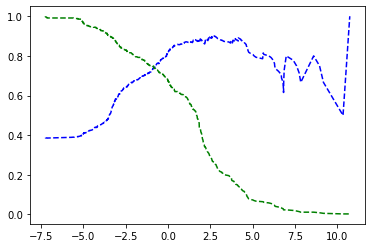

In [254]:
# Make prediction using cross_val_predict with decision_function method
sgd_predict = cross_val_predict(sgd_clf, training_prepared, training_target, cv=3, method='decision_function')

# Use the precision_recall_curve() function to compute precision and recall for all possible thresholds
precisions, recall, thresholds = precision_recall_curve(training_target, sgd_predict) 

# Use the three list of precisions, recall, thresholds from precision_recall_curve function to draw a graph
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], "g--", label='Recall')
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

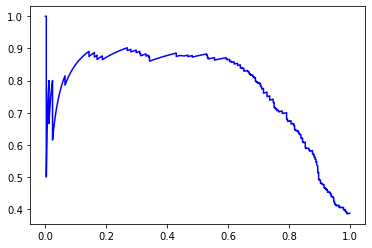

In [255]:
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recall, precisions, 'b')
plot_precision_vs_recall(precisions, recalls)

## ROC Curve

In [264]:
# Like the decision_function, plot ROC Curve
fpr, tpr, thresholds = roc_curve(training_target, sgd_predict)

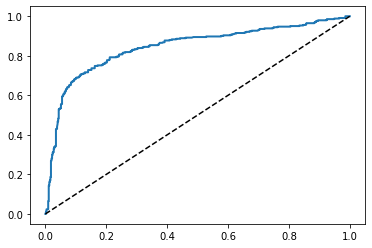

In [257]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
plot_roc_curve(fpr, tpr)

In [258]:
# Calculate the area under the curve using roc_auc_score, 
roc_auc_score(training_target, sgd_predict)

0.8439187677755409

## Random Forest Classifier

In [276]:
forest_clf = RandomForestClassifier(random_state=42)
# Use `predict_proba` of cross_val_predict.
# The output is [y, X]
forest_predict_proba = cross_val_predict(forest_clf, training_prepared, training_target, cv=3, method='predict_proba')
forest_predict = forest_predict_proba[:, 1]

# Extract information from ROC curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(training_target,forest_predict)

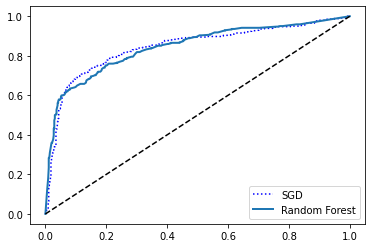

In [277]:
# Plot
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [278]:
roc_auc_score(training_target,forest_predict)

0.8435672514619883